In [1]:

import numpy as np
import pandas as pd

from google.colab import files
uploaded = files.upload()


Saving fighters.csv to fighters.csv


In [2]:
import io
df = pd.read_csv(io.BytesIO(uploaded["fighters.csv"]))
df.head()

,name,wins,looses,draws,ko_rate,stance,age,height,reach,country
0,Azizbek Abdumuxtar Abdugofurov,0,0,0,0%,Orthodox,Unknown,Unknown,Unknown,Uzbekistan
1,Franco Fernando Altamiranda,0,0,0,0%,Orthodox,Unknown,Unknown,Unknown,Argentina
2,Joaquin Saul Alvarez,0,0,0,0%,Orthodox,Unknown,Unknown,Unknown,"Venezuela, Bolivarian Republic of"
3,Saul Alvarez,54,1,2,63.2%,Orthodox,32,5.74 ft (1.75 m),70.47 inches (179 cm),Mexico
4,Sukru Altay,0,0,0,0%,Orthodox,38,Unknown,Unknown,Germany


DROP THE COLUMN="COUNTRY" WHICH DOES NOT PLAY A ROLE IN OUR 

In [ ]:
df.drop('country',inplace=True,axis=1)


 REPLACE THE "UNKNOWN" WITH 0  IN THE ENTIRETY OF THE DATASET AND WE CLEAN SOME COLUMNS


In [ ]:
df=df.replace('Unknown','0')
df['ko_rate'] = df['ko_rate'].str.replace('%', ' ')

columns_to_convert = ['wins', 'looses', 'draws', 'ko_rate', 'age']
df[columns_to_convert] = df[columns_to_convert].apply(pd.to_numeric, errors='coerce')
df[columns_to_convert] = df[columns_to_convert].fillna(0.0)
df[columns_to_convert] = df[columns_to_convert].astype(float)


FROM THE "HEIGHT" WE ONLY EXTRACT  THE METERS

In [ ]:
def extract_meters(s):
    if s == '0':
        return 0.0
    else:
        try:
            start = s.index("(") + 1
            end = s.index(" m)")
            return float(s[start:end].strip())
        except ValueError:
            return None

df['height'] = df['height'].apply(extract_meters)


FROM THE "REACH" YOU ONLY GET THE CENTIMETERS

In [ ]:
def extract_centimeters(s):
 if s == "0":
  return 0.0
 else:
  start = s.find("(") + 1
  end = s.find(" ", start)
  cm = float(s[start:end])
  return cm
df["reach"] = df["reach"].apply(extract_centimeters)




In [ ]:
df

,name,wins,looses,draws,ko_rate,stance,age,height,reach
0,Azizbek Abdumuxtar Abdugofurov,0.0,0.0,0.0,0.0,Orthodox,0.0,0.00,0.0
1,Franco Fernando Altamiranda,0.0,0.0,0.0,0.0,Orthodox,0.0,0.00,0.0
2,Joaquin Saul Alvarez,0.0,0.0,0.0,0.0,Orthodox,0.0,0.00,0.0
3,Saul Alvarez,54.0,1.0,2.0,63.2,Orthodox,32.0,1.75,179.0
4,Sukru Altay,0.0,0.0,0.0,0.0,Orthodox,38.0,0.00,0.0
...,...,...,...,...,...,...,...,...,...
2755,Zaur Abdullaev,8.0,1.0,0.0,50.0,Orthodox,28.0,1.75,0.0
2756,arthur abraham,47.0,6.0,0.0,56.6,Orthodox,42.0,1.75,183.0
2757,victor abraham,24.0,15.0,0.0,20.5,Orthodox,66.0,1.74,178.0
2758,reiya abe,16.0,2.0,1.0,42.1,Southpaw,29.0,0.00,0.0


In [ ]:
#import matplotlib.pyplot as plt
df[['wins', 'looses', 'draws', 'ko_rate', 'age']] = df[['wins', 'looses', 'draws', 'ko_rate', 'age']].astype(float)
df
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2760 entries, 0 to 2759
Data columns (total 9 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   name     2760 non-null   object 
 1   wins     2760 non-null   float64
 2   looses   2760 non-null   float64
 3   draws    2760 non-null   float64
 4   ko_rate  2760 non-null   float64
 5   stance   2760 non-null   object 
 6   age      2760 non-null   float64
 7   height   2759 non-null   float64
 8   reach    2760 non-null   float64
dtypes: float64(7), object(2)
memory usage: 194.2+ KB


WE ENCODE THE "STANCE"

In [ ]:
df1=pd.get_dummies(df,columns=['stance'],drop_first=True)
df1

,name,wins,looses,draws,ko_rate,age,height,reach,stance_Orthodox,stance_Southpaw
0,Azizbek Abdumuxtar Abdugofurov,0.0,0.0,0.0,0.0,0.0,0.00,0.0,1,0
1,Franco Fernando Altamiranda,0.0,0.0,0.0,0.0,0.0,0.00,0.0,1,0
2,Joaquin Saul Alvarez,0.0,0.0,0.0,0.0,0.0,0.00,0.0,1,0
3,Saul Alvarez,54.0,1.0,2.0,63.2,32.0,1.75,179.0,1,0
4,Sukru Altay,0.0,0.0,0.0,0.0,38.0,0.00,0.0,1,0
...,...,...,...,...,...,...,...,...,...,...
2755,Zaur Abdullaev,8.0,1.0,0.0,50.0,28.0,1.75,0.0,1,0
2756,arthur abraham,47.0,6.0,0.0,56.6,42.0,1.75,183.0,1,0
2757,victor abraham,24.0,15.0,0.0,20.5,66.0,1.74,178.0,1,0
2758,reiya abe,16.0,2.0,1.0,42.1,29.0,0.00,0.0,0,1


221.0

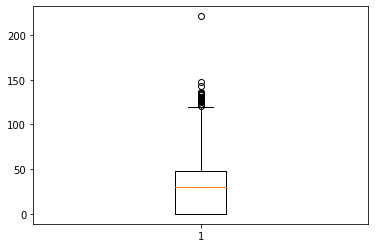

In [ ]:
data=df1['age']
plt.boxplot(data)
data.max()

WE SWITCH THE AGES THAT ARE OVER 60 WITH THE MEAN OF THE REST OF THE AGES




In [ ]:
k = df1['age']
S_age = k[(k <= 60.0) & (k > 0.0)].sum()
C_age = k[(k <= 60.0) & (k > 0.0)].count()

MEAN_AGE=S_age/C_age
MEAN_AGE=round(MEAN_AGE,1)
df1['age'] = df1['age'].apply(lambda x: MEAN_AGE if x >= 60 else x)
df1

,name,wins,looses,draws,ko_rate,age,height,reach,stance_Orthodox,stance_Southpaw
0,Azizbek Abdumuxtar Abdugofurov,0.0,0.0,0.0,0.0,0.0,0.00,0.0,1,0
1,Franco Fernando Altamiranda,0.0,0.0,0.0,0.0,0.0,0.00,0.0,1,0
2,Joaquin Saul Alvarez,0.0,0.0,0.0,0.0,0.0,0.00,0.0,1,0
3,Saul Alvarez,54.0,1.0,2.0,63.2,32.0,1.75,179.0,1,0
4,Sukru Altay,0.0,0.0,0.0,0.0,38.0,0.00,0.0,1,0
...,...,...,...,...,...,...,...,...,...,...
2755,Zaur Abdullaev,8.0,1.0,0.0,50.0,28.0,1.75,0.0,1,0
2756,arthur abraham,47.0,6.0,0.0,56.6,42.0,1.75,183.0,1,0
2757,victor abraham,24.0,15.0,0.0,20.5,36.1,1.74,178.0,1,0
2758,reiya abe,16.0,2.0,1.0,42.1,29.0,0.00,0.0,0,1


In [ ]:
df1['age'] = df1['age'].apply(lambda x: MEAN_AGE if x <= 10 else x)

In [ ]:
corr_matrix=df1.corr()

In [ ]:
import seaborn as sn
import matplotlib.pyplot as plt

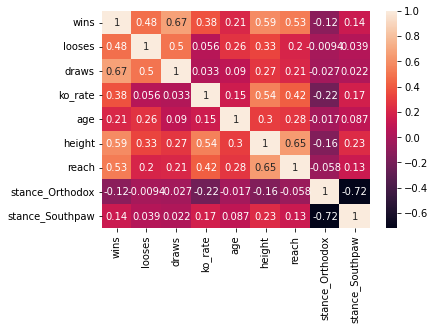

In [ ]:
sn.heatmap(corr_matrix, annot=True)
plt.show()

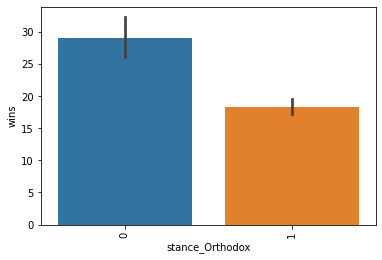

In [ ]:
sn.barplot(x = df1['stance_Orthodox'], y = df1['wins'])
plt.xticks(rotation = 90)
plt.show()

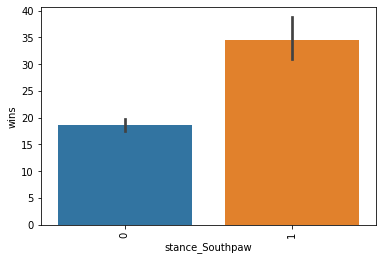

In [ ]:
sn.barplot(x = df1['stance_Southpaw'], y = df1['wins'])
plt.xticks(rotation = 90)
plt.show()

In [ ]:
unique_values =df1["age"].unique()
unique_values

array([36.1, 32. , 38. , 33. , 57. , 49. , 34. , 46. , 29. , 24. , 28. ,
       26. , 39. , 30. , 27. , 53. , 35. , 31. , 48. , 50. , 45. , 40. ,
       56. , 41. , 36. , 58. , 54. , 43. , 37. , 42. , 25. , 20. , 22. ,
       21. , 23. , 52. , 44. , 47. , 51. , 55. , 59. , 19. ])

CREATE A NEW COLUMN WITH THE LAST NAMES OF THE PLAYERS

In [ ]:
def extract_last_name(name):
    if ' JR' in name.upper():
        name = name[:-3]
    return name.split()[-1]
df1['last_name'] = df1['name'].apply(extract_last_name)
df1['last_name'] = df1['last_name'].str.upper()



In [ ]:
import numpy as np
import pandas as pd

from google.colab import files
uploaded = files.upload()

Saving popular_matches.csv to popular_matches (6).csv


In [ ]:
popular_matches = pd.read_csv(io.BytesIO(uploaded["popular_matches.csv"]))


 COLUMNS "DATE"  ANA "PLACE" WHICH DOES NOT PLAY A ROLE IN OUR PREDICTIONS




REPLACE THE MISSING VALUES WITH THE MEAN OF THE REST

I CREATE COLUMNS WITH THE LAST NAMES OF THE ATHLETES

FIND THE WINNER 

CONNECTION OF THE DATASETS

In [ ]:




popular_matches=popular_matches.drop(columns=['date','place'])
popular_matches['opponent_1'] = popular_matches['opponent_1'].str.upper()
popular_matches['opponent_2'] = popular_matches['opponent_2'].str.upper()



list2=[ 'opponent_1_estimated_punch_power',
        'opponent_2_estimated_punch_power',
        'opponent_1_estimated_punch_resistance',
        'opponent_2_estimated_punch_resistance',
        'opponent_1_estimated_ability_to_take_punch',
        'opponent_2_estimated_ability_to_take_punch', 'opponent_1_rounds_boxed',
        'opponent_2_rounds_boxed', 'opponent_1_round_ko_percentage',
        'opponent_2_round_ko_percentage', 'opponent_1_has_been_ko_percentage',
        'opponent_2_has_been_ko_percentage', 'opponent_1_avg_weight',
        'opponent_2_avg_weight' ]


for i in list2 : 
  mean_value=popular_matches[i].mean()
  popular_matches.fillna(value=round(mean_value,2), inplace=True)
popular_matches[['opponent_1_estimated_punch_power', 'opponent_2_estimated_punch_power', 'opponent_1_rounds_boxed']] = popular_matches[['opponent_1_estimated_punch_power', 'opponent_2_estimated_punch_power', 'opponent_1_rounds_boxed']].astype(float)



popular_matches['last_name_1'] = popular_matches['opponent_1'].apply(extract_last_name)
popular_matches['last_name_2'] = popular_matches['opponent_2'].apply(extract_last_name)

#popular_matches['opponent_1'] = popular_matches['opponent_1'].str.upper().str.replace(' ', '')
#popular_matches['opponent_2'] = popular_matches['opponent_2'].str.upper().str.replace(' ', '')



matrix =popular_matches['verdict']


j=0
k=0
for i in matrix :
  
  all_words = i.split()
  first_word= all_words[0]
  

  matrix[j]=first_word
  j=j+1

def take_the_opponents():
    list_name_1, list_name_2 = [], []
    for i in range(popular_matches.shape[0]):
        name_opponent_12 = popular_matches['last_name_1'][i]
        name_opponent_23 = popular_matches['last_name_2'][i]

        list_name_1.append(name_opponent_12)
        list_name_2.append(name_opponent_23)
    
    return list_name_1, list_name_2

list_name_opponent_12, list_name_opponent_23 = take_the_opponents()
list_name_opponent_12



list_columns_1_str = ['wins_1', 'looses_1', 'draws_1', 'ko_rate_1', 'age_1','height_1', 'reach_1', 'stance_Orthodox_1', 'stance_Southpaw_1']

list_columns_2_str = ['wins_2', 'looses_2', 'draws_2', 'ko_rate_2', 'age_2','height_2', 'reach_2', 'stance_Orthodox_2', 'stance_Southpaw_2']

list_columns_1_str
def features_1(name):
    row = df1.loc[df1['last_name'] ==name]
    row_values = row[row.columns].values

    if row_values.shape[0] == 1:
        return row_values[0][1:]
    else:
        return np.zeros(9, dtype=float)

  


     

<ipython-input-587-7c55dbd5c454>:45: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  matrix[j]=first_word


In [ ]:
def full_DATA():
    columns_1 = [features_1(name) for name in list_name_opponent_12]
    columns_2 = [features_1(name) for name in list_name_opponent_23]
    
    for i in range(len(list_columns_1_str)):
        popular_matches[list_columns_1_str[i]] = [col[i] for col in columns_1]
    
    for i in range(len(list_columns_2_str)):
        popular_matches[list_columns_2_str[i]] = [col[i] for col in columns_2]
    
    return popular_matches
MAKARIPANAGIAMOY=full_DATA()
MAKARIPANAGIAMOY    


,opponent_1,opponent_2,opponent_1_estimated_punch_power,opponent_2_estimated_punch_power,opponent_1_estimated_punch_resistance,opponent_2_estimated_punch_resistance,opponent_1_estimated_ability_to_take_punch,opponent_2_estimated_ability_to_take_punch,opponent_1_rounds_boxed,opponent_2_rounds_boxed,opponent_1_round_ko_percentage,opponent_2_round_ko_percentage,opponent_1_has_been_ko_percentage,opponent_2_has_been_ko_percentage,opponent_1_avg_weight,opponent_2_avg_weight,verdict,last_name_1,last_name_2,wins_1,looses_1,draws_1,ko_rate_1,age_1,height_1,reach_1,stance_Orthodox_1,stance_Southpaw_1,wins_2,looses_2,draws_2,ko_rate_2,age_2,height_2,reach_2,stance_Orthodox_2,stance_Southpaw_2
0,VASYLLOMACHENKO,LUKECAMPBELL,72.0,72.0,73.90,60.50,78.0,73.00,119.0,130.00,8.40,12.31,0.00,0.00,127.11,135.24,Lomachenko,LOMACHENKO,CAMPBELL,14.0,2.0,0.0,62.5,34.0,1.68,166.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0
1,ORLANDOFIORDIGIGLIO,SAMEGGINGTON,59.0,59.0,55.40,54.50,68.0,66.00,200.0,177.00,6.50,8.47,3.03,6.25,152.50,148.93,Eggington,FIORDIGIGLIO,EGGINGTON,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,28.0,7.0,0.0,48.6,28.0,1.80,0.0,1.0,0.0
2,GENNADYGOLOVKIN,SERGIYDEREVYANCHENKO,82.0,82.0,68.00,63.30,84.0,75.00,200.0,81.00,17.50,12.35,0.00,0.00,159.66,164.04,Golovkin,GOLOVKIN,DEREVYANCHENKO,41.0,1.0,1.0,83.7,40.0,1.79,178.0,1.0,0.0,13.0,2.0,0.0,66.7,36.0,1.70,171.0,1.0,0.0
3,CHAZZWITHERSPOON,OLEKSANDRUSYK,69.0,69.0,59.60,68.90,79.0,80.00,182.0,125.00,15.93,9.60,4.76,66.29,292.71,200.10,Usyk,WITHERSPOON,USYK,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,18.0,0.0,0.0,72.2,35.0,1.90,0.0,0.0,1.0
4,EBENEZERTETTEH,DANIELDUBOIS,46.0,46.0,66.29,44.40,50.0,69.00,38.0,39.00,23.68,30.77,0.00,0.00,178.67,230.38,Dubois,TETTEH,DUBOIS,9.0,1.0,0.0,90.0,36.1,0.00,0.0,0.0,0.0,15.0,1.0,0.0,87.5,25.0,1.94,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
147,THEOPHILUSTETTEH,ANTHONYFOWLER,56.0,56.0,41.70,45.70,67.0,60.00,147.0,65.00,6.12,13.85,8.00,66.29,154.88,155.90,Fowler,TETTEH,FOWLER,9.0,1.0,0.0,90.0,36.1,0.00,0.0,0.0,0.0,14.0,1.0,0.0,73.3,31.0,1.80,0.0,1.0,0.0
148,DEONTAYWILDER,TYSONFURY,88.0,88.0,63.90,66.90,83.0,86.00,143.0,186.00,28.67,10.75,0.00,0.00,242.40,247.50,Fury,WILDER,FURY,42.0,1.0,1.0,93.2,36.0,2.00,211.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0
149,SCOTTQUIGG,JONOCARROLL,75.0,75.0,63.40,52.20,76.0,63.00,200.0,122.00,13.00,66.29,0.00,0.00,124.80,133.43,Carroll,QUIGG,CARROLL,35.0,3.0,2.0,65.0,33.0,1.73,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0
150,JOEHUGHES,SAMMAXWELL,57.0,57.0,52.30,66.29,65.0,66.29,182.0,66.29,3.85,66.29,0.00,0.00,141.86,66.29,Maxwell,HUGHES,MAXWELL,16.0,4.0,2.0,8.7,32.0,0.00,0.0,0.0,1.0,0.0,0.0,0.0,0.0,36.1,0.00,0.0,1.0,0.0


In [ ]:
df1

,name,wins,looses,draws,ko_rate,age,height,reach,stance_Orthodox,stance_Southpaw,last_name
0,Azizbek Abdumuxtar Abdugofurov,0.0,0.0,0.0,0.0,36.1,0.00,0.0,1,0,ABDUGOFUROV
1,Franco Fernando Altamiranda,0.0,0.0,0.0,0.0,36.1,0.00,0.0,1,0,ALTAMIRANDA
2,Joaquin Saul Alvarez,0.0,0.0,0.0,0.0,36.1,0.00,0.0,1,0,ALVAREZ
3,Saul Alvarez,54.0,1.0,2.0,63.2,32.0,1.75,179.0,1,0,ALVAREZ
4,Sukru Altay,0.0,0.0,0.0,0.0,38.0,0.00,0.0,1,0,ALTAY
...,...,...,...,...,...,...,...,...,...,...,...
2755,Zaur Abdullaev,8.0,1.0,0.0,50.0,28.0,1.75,0.0,1,0,ABDULLAEV
2756,arthur abraham,47.0,6.0,0.0,56.6,42.0,1.75,183.0,1,0,ABRAHAM
2757,victor abraham,24.0,15.0,0.0,20.5,36.1,1.74,178.0,1,0,ABRAHAM
2758,reiya abe,16.0,2.0,1.0,42.1,29.0,0.00,0.0,0,1,ABE


CREATE THE NEW COLUMNS THAT WILL BE A PART OF THE FINAL DATASET

In [ ]:


list_columns_1_str = ['wins_1', 'looses_1', 'draws_1', 'ko_rate_1', 'age_1','height_1', 'reach_1', 'stance_Orthodox_1', 'stance_Southpaw_1']

list_columns_2_str = ['wins_2', 'looses_2', 'draws_2', 'ko_rate_2', 'age_2','height_2', 'reach_2', 'stance_Orthodox_2', 'stance_Southpaw_2']

list_columns_1_str
    
   

['wins_1',
 'looses_1',
 'draws_1',
 'ko_rate_1',
 'age_1',
 'height_1',
 'reach_1',
 'stance_Orthodox_1',
 'stance_Southpaw_1']

In [ ]:
def features_1(name):
    row = df1.loc[df1['last_name'] ==name]
    row_values = row[row.columns].values

    if row_values.shape[0] == 1:
        return row_values[0][1:]
    else:
        return np.zeros(9, dtype=float)


In [ ]:
def full_DATA():
    columns_1 = [features_1(name) for name in list_name_opponent_12]
    columns_2 = [features_1(name) for name in list_name_opponent_23]
    
    for i in range(len(list_columns_1_str)):
        popular_matches[list_columns_1_str[i]] = [col[i] for col in columns_1]
    
    for i in range(len(list_columns_2_str)):
        popular_matches[list_columns_2_str[i]] = [col[i] for col in columns_2]
    
    return popular_matches

In [ ]:
MAKARIPANAGIAMOY=full_DATA()
MAKARIPANAGIAMOY

,opponent_1,opponent_2,opponent_1_estimated_punch_power,opponent_2_estimated_punch_power,opponent_1_estimated_punch_resistance,opponent_2_estimated_punch_resistance,opponent_1_estimated_ability_to_take_punch,opponent_2_estimated_ability_to_take_punch,opponent_1_rounds_boxed,opponent_2_rounds_boxed,opponent_1_round_ko_percentage,opponent_2_round_ko_percentage,opponent_1_has_been_ko_percentage,opponent_2_has_been_ko_percentage,opponent_1_avg_weight,opponent_2_avg_weight,verdict,last_name_1,last_name_2,wins_1,looses_1,draws_1,ko_rate_1,age_1,height_1,reach_1,stance_Orthodox_1,stance_Southpaw_1,wins_2,looses_2,draws_2,ko_rate_2,age_2,height_2,reach_2,stance_Orthodox_2,stance_Southpaw_2
0,VASYLLOMACHENKO,LUKECAMPBELL,72.0,72.0,73.90,60.50,78.0,73.00,119.0,130.00,8.40,12.31,0.00,0.00,127.11,135.24,Lomachenko,LOMACHENKO,CAMPBELL,14.0,2.0,0.0,62.5,34.0,1.68,166.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0
1,ORLANDOFIORDIGIGLIO,SAMEGGINGTON,59.0,59.0,55.40,54.50,68.0,66.00,200.0,177.00,6.50,8.47,3.03,6.25,152.50,148.93,Eggington,FIORDIGIGLIO,EGGINGTON,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,28.0,7.0,0.0,48.6,28.0,1.80,0.0,1.0,0.0
2,GENNADYGOLOVKIN,SERGIYDEREVYANCHENKO,82.0,82.0,68.00,63.30,84.0,75.00,200.0,81.00,17.50,12.35,0.00,0.00,159.66,164.04,Golovkin,GOLOVKIN,DEREVYANCHENKO,41.0,1.0,1.0,83.7,40.0,1.79,178.0,1.0,0.0,13.0,2.0,0.0,66.7,36.0,1.70,171.0,1.0,0.0
3,CHAZZWITHERSPOON,OLEKSANDRUSYK,69.0,69.0,59.60,68.90,79.0,80.00,182.0,125.00,15.93,9.60,4.76,66.29,292.71,200.10,Usyk,WITHERSPOON,USYK,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,18.0,0.0,0.0,72.2,35.0,1.90,0.0,0.0,1.0
4,EBENEZERTETTEH,DANIELDUBOIS,46.0,46.0,66.29,44.40,50.0,69.00,38.0,39.00,23.68,30.77,0.00,0.00,178.67,230.38,Dubois,TETTEH,DUBOIS,9.0,1.0,0.0,90.0,0.0,0.00,0.0,0.0,0.0,15.0,1.0,0.0,87.5,25.0,1.94,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
147,THEOPHILUSTETTEH,ANTHONYFOWLER,56.0,56.0,41.70,45.70,67.0,60.00,147.0,65.00,6.12,13.85,8.00,66.29,154.88,155.90,Fowler,TETTEH,FOWLER,9.0,1.0,0.0,90.0,0.0,0.00,0.0,0.0,0.0,14.0,1.0,0.0,73.3,31.0,1.80,0.0,1.0,0.0
148,DEONTAYWILDER,TYSONFURY,88.0,88.0,63.90,66.90,83.0,86.00,143.0,186.00,28.67,10.75,0.00,0.00,242.40,247.50,Fury,WILDER,FURY,42.0,1.0,1.0,93.2,36.0,2.00,211.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0
149,SCOTTQUIGG,JONOCARROLL,75.0,75.0,63.40,52.20,76.0,63.00,200.0,122.00,13.00,66.29,0.00,0.00,124.80,133.43,Carroll,QUIGG,CARROLL,35.0,3.0,2.0,65.0,33.0,1.73,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0
150,JOEHUGHES,SAMMAXWELL,57.0,57.0,52.30,66.29,65.0,66.29,182.0,66.29,3.85,66.29,0.00,0.00,141.86,66.29,Maxwell,HUGHES,MAXWELL,16.0,4.0,2.0,8.7,32.0,0.00,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,1.0,0.0


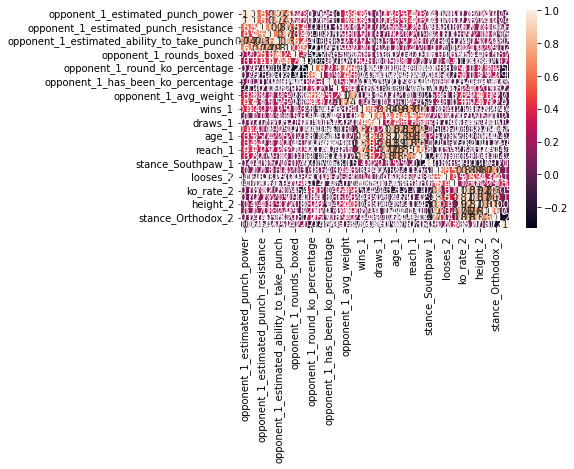

In [ ]:
corr_matrix=MAKARIPANAGIAMOY.corr()
sn.heatmap(corr_matrix, annot=True)
plt.show()

In [ ]:
pd.options.display.max_columns = None


In [ ]:
MAKARIPANAGIAMOY['verdict'] = MAKARIPANAGIAMOY['verdict'].str.upper()

In [ ]:


# Get the unique values in the column you're interested in
unique_values =MAKARIPANAGIAMOY["verdict"].unique()

# Print the unique values
print(unique_values)


['LOMACHENKO' 'EGGINGTON' 'GOLOVKIN' 'USYK' 'DUBOIS' 'SPENCE' 'HANEY'
 'FURY' 'POVETKIN' 'BETERBIEV' 'TAYLOR' 'FITZGERALD' 'CHISORA' 'OLATUNJI'
 'DRAW' 'ALVAREZ' 'TYSON' 'ALI' 'LEONARD' 'MAYWEATHER' 'WILDER' 'JOSHUA'
 'RUIZ' 'SMITH' 'UNKNOWN' 'PERALTA' 'PARKER' 'LINARES' 'BELLEW' 'WARD'
 'CLEVERLY' 'PORTER' 'FRAMPTON' 'INOUE' 'CAMPBELL' 'WARRINGTON' 'WHYTE'
 'DIXON' 'PRICE' 'PACQUIAO' 'GETHING' 'EUBANK' 'BENAVIDEZ' 'DAVIES'
 'FEIGENBUTZ' 'KOVALEV' 'CHARLO' 'MARTIN' 'GARCIA' 'FOWLER' 'CARROLL'
 'MAXWELL' 'LOPEZ']


In [ ]:


MAKARIPANAGIAMOY = MAKARIPANAGIAMOY[MAKARIPANAGIAMOY['verdict'] != 'Unknown']





In [ ]:
MAKARIPANAGIAMOY

,opponent_1,opponent_2,opponent_1_estimated_punch_power,opponent_2_estimated_punch_power,opponent_1_estimated_punch_resistance,opponent_2_estimated_punch_resistance,opponent_1_estimated_ability_to_take_punch,opponent_2_estimated_ability_to_take_punch,opponent_1_rounds_boxed,opponent_2_rounds_boxed,opponent_1_round_ko_percentage,opponent_2_round_ko_percentage,opponent_1_has_been_ko_percentage,opponent_2_has_been_ko_percentage,opponent_1_avg_weight,opponent_2_avg_weight,verdict,last_name_1,last_name_2,wins_1,looses_1,draws_1,ko_rate_1,age_1,height_1,reach_1,stance_Orthodox_1,stance_Southpaw_1,wins_2,looses_2,draws_2,ko_rate_2,age_2,height_2,reach_2,stance_Orthodox_2,stance_Southpaw_2,winner
0,VASYLLOMACHENKO,LUKECAMPBELL,72.0,72.0,73.90,60.50,78.0,73.00,119.0,130.00,8.40,12.31,0.00,0.00,127.11,135.24,LOMACHENKO,LOMACHENKO,CAMPBELL,14.0,2.0,0.0,62.5,34.0,1.68,166.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,1
1,ORLANDOFIORDIGIGLIO,SAMEGGINGTON,59.0,59.0,55.40,54.50,68.0,66.00,200.0,177.00,6.50,8.47,3.03,6.25,152.50,148.93,EGGINGTON,FIORDIGIGLIO,EGGINGTON,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,28.0,7.0,0.0,48.6,28.0,1.80,0.0,1.0,0.0,2
2,GENNADYGOLOVKIN,SERGIYDEREVYANCHENKO,82.0,82.0,68.00,63.30,84.0,75.00,200.0,81.00,17.50,12.35,0.00,0.00,159.66,164.04,GOLOVKIN,GOLOVKIN,DEREVYANCHENKO,41.0,1.0,1.0,83.7,40.0,1.79,178.0,1.0,0.0,13.0,2.0,0.0,66.7,36.0,1.70,171.0,1.0,0.0,1
3,CHAZZWITHERSPOON,OLEKSANDRUSYK,69.0,69.0,59.60,68.90,79.0,80.00,182.0,125.00,15.93,9.60,4.76,66.29,292.71,200.10,USYK,WITHERSPOON,USYK,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,18.0,0.0,0.0,72.2,35.0,1.90,0.0,0.0,1.0,2
4,EBENEZERTETTEH,DANIELDUBOIS,46.0,46.0,66.29,44.40,50.0,69.00,38.0,39.00,23.68,30.77,0.00,0.00,178.67,230.38,DUBOIS,TETTEH,DUBOIS,9.0,1.0,0.0,90.0,36.1,0.00,0.0,0.0,0.0,15.0,1.0,0.0,87.5,25.0,1.94,0.0,1.0,0.0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
147,THEOPHILUSTETTEH,ANTHONYFOWLER,56.0,56.0,41.70,45.70,67.0,60.00,147.0,65.00,6.12,13.85,8.00,66.29,154.88,155.90,FOWLER,TETTEH,FOWLER,9.0,1.0,0.0,90.0,36.1,0.00,0.0,0.0,0.0,14.0,1.0,0.0,73.3,31.0,1.80,0.0,1.0,0.0,2
148,DEONTAYWILDER,TYSONFURY,88.0,88.0,63.90,66.90,83.0,86.00,143.0,186.00,28.67,10.75,0.00,0.00,242.40,247.50,FURY,WILDER,FURY,42.0,1.0,1.0,93.2,36.0,2.00,211.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,2
149,SCOTTQUIGG,JONOCARROLL,75.0,75.0,63.40,52.20,76.0,63.00,200.0,122.00,13.00,66.29,0.00,0.00,124.80,133.43,CARROLL,QUIGG,CARROLL,35.0,3.0,2.0,65.0,33.0,1.73,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,2
150,JOEHUGHES,SAMMAXWELL,57.0,57.0,52.30,66.29,65.0,66.29,182.0,66.29,3.85,66.29,0.00,0.00,141.86,66.29,MAXWELL,HUGHES,MAXWELL,16.0,4.0,2.0,8.7,32.0,0.00,0.0,0.0,1.0,0.0,0.0,0.0,0.0,36.1,0.00,0.0,1.0,0.0,2


In [ ]:
def determine_winner(row):
    verdict = row['verdict']
    opponent1 = row['last_name_1']
    opponent2 = row['last_name_2']
    if verdict == opponent2:
        return 2
    elif verdict == opponent1:
        return 1
    else: 
        return 0
       
     
  

MAKARIPANAGIAMOY['winner'] = MAKARIPANAGIAMOY.apply(determine_winner, axis=1)



In [ ]:

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import RidgeCV
from sklearn.metrics import mean_squared_error
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

In [ ]:
scaler = StandardScaler()

In [ ]:
winner_2 = MAKARIPANAGIAMOY.pop('winner')


In [ ]:
MAKARIPANAGIAMOY=popular_matches.drop(columns=['last_name_1', 'last_name_2', 'opponent_1', 'opponent_2','verdict'])


In [ ]:
MAKARIPANAGIAMOY

,opponent_1_estimated_punch_power,opponent_2_estimated_punch_power,opponent_1_estimated_punch_resistance,opponent_2_estimated_punch_resistance,opponent_1_estimated_ability_to_take_punch,opponent_2_estimated_ability_to_take_punch,opponent_1_rounds_boxed,opponent_2_rounds_boxed,opponent_1_round_ko_percentage,opponent_2_round_ko_percentage,opponent_1_has_been_ko_percentage,opponent_2_has_been_ko_percentage,opponent_1_avg_weight,opponent_2_avg_weight,wins_1,looses_1,draws_1,ko_rate_1,age_1,height_1,reach_1,stance_Orthodox_1,stance_Southpaw_1,wins_2,looses_2,draws_2,ko_rate_2,age_2,height_2,reach_2,stance_Orthodox_2,stance_Southpaw_2
0,72.0,72.0,73.90,60.50,78.0,73.00,119.0,130.00,8.40,12.31,0.00,0.00,127.11,135.24,14.0,2.0,0.0,62.5,34.0,1.68,166.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0
1,59.0,59.0,55.40,54.50,68.0,66.00,200.0,177.00,6.50,8.47,3.03,6.25,152.50,148.93,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,28.0,7.0,0.0,48.6,28.0,1.80,0.0,1.0,0.0
2,82.0,82.0,68.00,63.30,84.0,75.00,200.0,81.00,17.50,12.35,0.00,0.00,159.66,164.04,41.0,1.0,1.0,83.7,40.0,1.79,178.0,1.0,0.0,13.0,2.0,0.0,66.7,36.0,1.70,171.0,1.0,0.0
3,69.0,69.0,59.60,68.90,79.0,80.00,182.0,125.00,15.93,9.60,4.76,66.29,292.71,200.10,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,18.0,0.0,0.0,72.2,35.0,1.90,0.0,0.0,1.0
4,46.0,46.0,66.29,44.40,50.0,69.00,38.0,39.00,23.68,30.77,0.00,0.00,178.67,230.38,9.0,1.0,0.0,90.0,36.1,0.00,0.0,0.0,0.0,15.0,1.0,0.0,87.5,25.0,1.94,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
147,56.0,56.0,41.70,45.70,67.0,60.00,147.0,65.00,6.12,13.85,8.00,66.29,154.88,155.90,9.0,1.0,0.0,90.0,36.1,0.00,0.0,0.0,0.0,14.0,1.0,0.0,73.3,31.0,1.80,0.0,1.0,0.0
148,88.0,88.0,63.90,66.90,83.0,86.00,143.0,186.00,28.67,10.75,0.00,0.00,242.40,247.50,42.0,1.0,1.0,93.2,36.0,2.00,211.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0
149,75.0,75.0,63.40,52.20,76.0,63.00,200.0,122.00,13.00,66.29,0.00,0.00,124.80,133.43,35.0,3.0,2.0,65.0,33.0,1.73,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0
150,57.0,57.0,52.30,66.29,65.0,66.29,182.0,66.29,3.85,66.29,0.00,0.00,141.86,66.29,16.0,4.0,2.0,8.7,32.0,0.00,0.0,0.0,1.0,0.0,0.0,0.0,0.0,36.1,0.00,0.0,1.0,0.0


In [ ]:
MAKARIPANAGIAMOY = scaler.fit_transform(MAKARIPANAGIAMOY)

In [ ]:
model = RidgeCV()
x_train, x_test, y_train, y_test = train_test_split(MAKARIPANAGIAMOY,winner_2, test_size = 0.3, random_state = 10)
model.fit(x_train, y_train)
train_score = model.score(x_train, y_train)
test_score = model.score(x_test, y_test)
y_pred = model.predict(x_test)
error = mean_squared_error(y_pred, y_test)

print("////////////////////////////////////////")
print("Resuls: RidgeCV(winner)")
print("Train score: %s" % train_score)
print("Test score: %s" % test_score)
print("Error(MSE): %s" % error)
print("////////////////////////////////////////")

////////////////////////////////////////
Resuls: RidgeCV(winner)
Train score: 0.3336040469803423
Test score: 0.13036526101982782
Error(MSE): 0.3670055869136548
////////////////////////////////////////


In [ ]:
model = RandomForestClassifier(n_estimators = 1000, max_depth = 3)
x_train, x_test, y_train, y_test = train_test_split(MAKARIPANAGIAMOY, winner_2, test_size = 0.3)
model.fit(x_train, y_train)
train_score = model.score(x_train, y_train)
test_score = model.score(x_test, y_test)
y_pred = model.predict(x_test)
errors = abs(y_pred - y_test)
accuracy = accuracy_score(y_test, y_pred)

print("////////////////////////////////////////")
print("Resuls: RandomForestClassifier(winner)")
print("Train score: %s" % train_score)
print("Test score: %s" % test_score)
print("Accuracy: %s" % accuracy)
print("////////////////////////////////////////")

////////////////////////////////////////
Resuls: RandomForestClassifier(winner)
Train score: 0.8490566037735849
Test score: 0.7391304347826086
Accuracy: 0.7391304347826086
////////////////////////////////////////


In [ ]:
model = XGBClassifier(max_depth=6, learning_rate=0.001, n_estimators=100, gamma=0, 
min_child_weight=1, subsample=0.8, colsample_bytree=0.8, reg_alpha=0.005)

x_train, x_test, y_train, y_test = train_test_split(MAKARIPANAGIAMOY, winner_2, test_size = 0.3, random_state = 15)

model.fit(x_train, y_train)
train_score = model.score(x_train, y_train)
test_score = model.score(x_test, y_test)
y_pred_winner = model.predict(x_test)
accuracy = accuracy_score(y_test,  y_pred_winner)

print("////////////////////////////////////////")
print("Resuls: XGBClassifier(winner)")
print("Train score: %s" % train_score)
print("Test score: %s" % test_score)
print("Accuracy: %s" % accuracy)
print("////////////////////////////////////////")

////////////////////////////////////////
Resuls: XGBClassifier(winner)
Train score: 0.9905660377358491
Test score: 0.6956521739130435
Accuracy: 0.6956521739130435
////////////////////////////////////////


In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

# split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(MAKARIPANAGIAMOY, winner_2, test_size=0.2, random_state=42)

# list of models to train
models = [
    LogisticRegression(),
    DecisionTreeClassifier(),
    KNeighborsClassifier(),
    RandomForestClassifier()
]

# train and evaluate each model
for model in models:
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    print(f'{model.__class__.__name__}: {accuracy:.2f}')


LogisticRegression: 0.65
DecisionTreeClassifier: 0.68
KNeighborsClassifier: 0.58
RandomForestClassifier: 0.71
